In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df = df.drop("record_ID", axis = 1)

In [4]:
df[['day', 'month', 'year']] = df['week'].str.split('/', expand = True)
df[['day', 'month', 'year']] = df[['day', 'month', 'year']].astype(int)

In [5]:
df =df.drop('week', axis = 1)
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,1,11
1,8091,216419,99.0375,99.0375,0,0,28,17,1,11
2,8091,216425,133.9500,133.9500,0,0,19,17,1,11
3,8091,216233,133.9500,133.9500,0,0,44,17,1,11
4,8091,217390,141.0750,141.0750,0,0,52,17,1,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,9,7,13
150146,9984,223153,235.8375,235.8375,0,0,30,9,7,13
150147,9984,245338,357.6750,483.7875,1,1,31,9,7,13
150148,9984,547934,141.7875,191.6625,0,1,12,9,7,13


<Axes: >

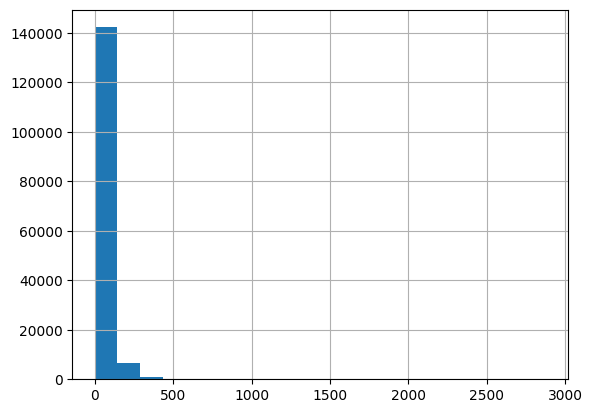

In [6]:
df.units_sold.hist(bins= 20)

In [7]:
df = df[df.units_sold <= df.units_sold.quantile(0.99)]


<Axes: >

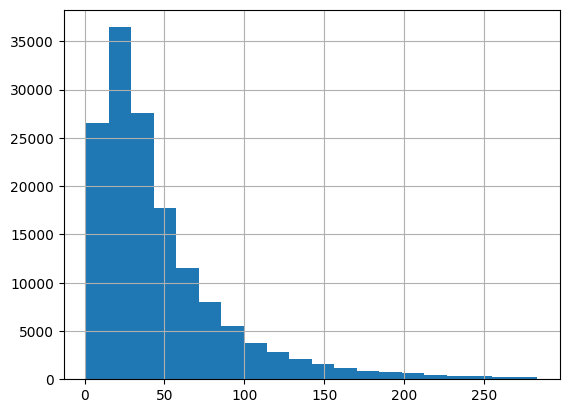

In [8]:
df.units_sold.hist(bins = 20)

In [9]:
len(df.store_id.unique())

76

In [10]:
len(df.sku_id.unique())

28

In [11]:
df = df.join(pd.get_dummies(df.store_id, prefix="store")).drop('store_id', axis=1)
df = df.join(pd.get_dummies(df.sku_id, prefix="sku")).drop('sku_id', axis=1)

In [12]:
df

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,sku_320485,sku_327492,sku_378934,sku_398721,sku_545621,sku_546789,sku_547934,sku_600934,sku_673209,sku_679023
0,99.0375,111.8625,0,0,20,17,1,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,1,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,1,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,1,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,1,11,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,9,7,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,9,7,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,9,7,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,9,7,13,False,False,...,False,False,False,False,False,False,True,False,False,False


array([[<Axes: title={'center': 'total_price'}>,
        <Axes: title={'center': 'base_price'}>,
        <Axes: title={'center': 'is_featured_sku'}>],
       [<Axes: title={'center': 'is_display_sku'}>,
        <Axes: title={'center': 'units_sold'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

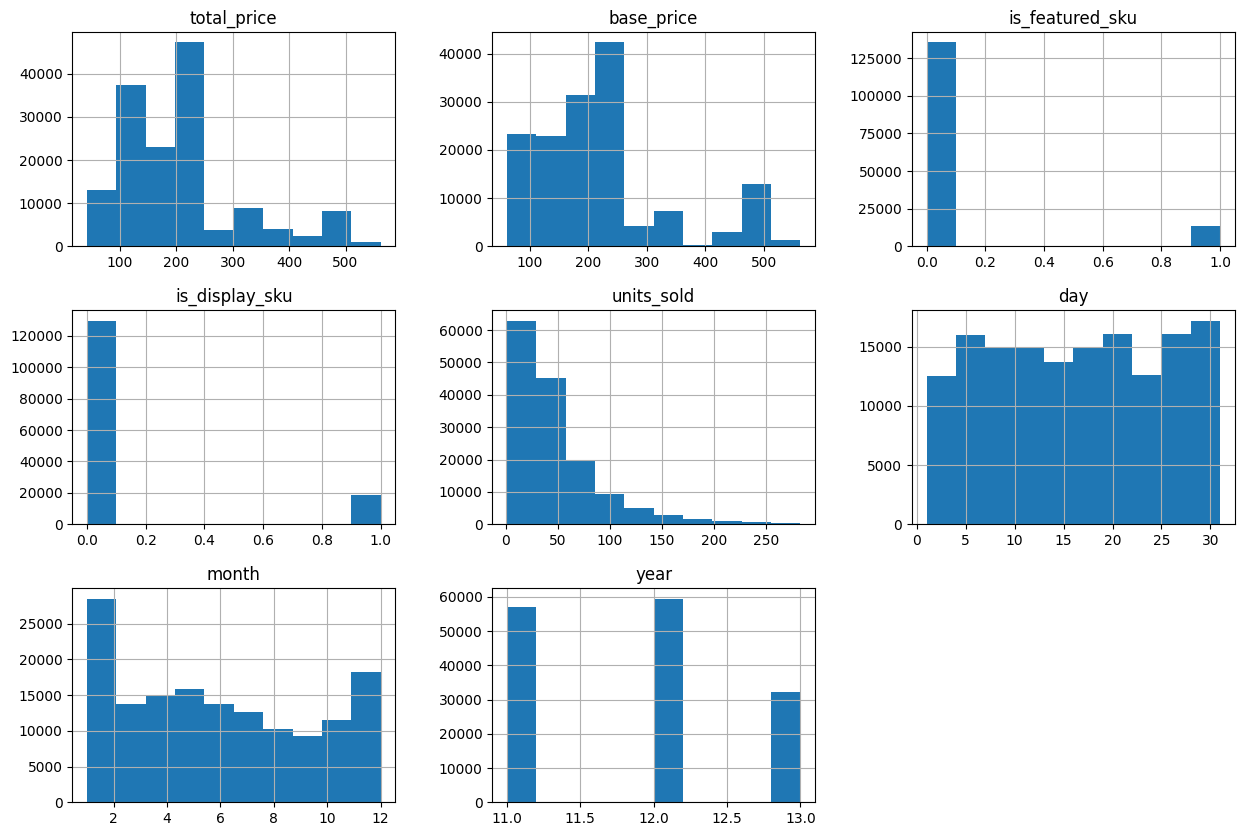

In [13]:
df.hist(figsize = (15,10))

In [14]:
print(df.isnull().sum())

total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
                  ..
sku_546789         0
sku_547934         0
sku_600934         0
sku_673209         0
sku_679023         0
Length: 112, dtype: int64


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

target_column = 'units_sold'
X = df.drop(columns=[target_column])
y = df[target_column]

numeric_features = [col for col in X.columns if not col.startswith(('store_', 'sku_'))]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough' 
)



In [16]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score

models = {
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "Ridge": Ridge()
}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{name}: RMSE = {-scores.mean():.4f}")


RandomForest: RMSE = 23.4397
GradientBoosting: RMSE = 28.8163
Ridge: RMSE = 28.4988


In [17]:
test_df = pd.read_csv("test.csv")
test_df = test_df.drop("record_ID", axis=1)
test_df[['day', 'month', 'year']] = test_df['week'].str.split('/', expand=True).astype(int)
test_df = test_df.drop('week', axis=1)

# One-hot encode store and sku
test_df = test_df.join(pd.get_dummies(test_df['store_id'], prefix='store')).drop('store_id', axis=1)
test_df = test_df.join(pd.get_dummies(test_df['sku_id'], prefix='sku')).drop('sku_id', axis=1)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Define best model after CV
best_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)

# Final pipeline with the best model
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_model)
])

# Train on all training data
final_pipeline.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['total_price', 'base_price',
                                                   'is_featured_sku',
                                                   'is_display_sku', 'day',
                                                   'month', 'year'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=20, n_estimators=200,
                                       random_state=42))])

In [20]:
test_df = test_df[X.columns]  # align column order with training set
predictions = final_pipeline.predict(test_df)

pd.DataFrame({'predicted_units_sold': predictions}).to_csv('test_predictions.csv', index=False)
print("✅ Predictions saved to test_predictions.csv")


✅ Predictions saved to test_predictions.csv
